# Dogs vs Cats machine learning challenge

In [158]:
# This is the notebook for playing around with Python machine learning
# For image recognition.

import os
import cv2
import numpy as np
from tqdm import tqdm
from random import shuffle, randint, random

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

from matplotlib import pyplot as plt

In [3]:
# Constants:

TREE = os.path.abspath(os.path.join(".."))
TRAINING_DIR = os.path.join(TREE, "dogs_cats/train")
TEST_DIR = os.path.join(TREE, "dogs_cats/test")
IMG_SIZE = 50
LEARNING_RATE = 1e-3

MODEL_NAME = "dogsvscats-%f-%s.model" % (LEARNING_RATE, "2conv-basic")

In [4]:
def label_image(img):
    word_label = img.split(".")[-3]
    if word_label == "cat":
        return [1, 0]
    elif word_label == "dog":
        return [0, 1]

In [5]:
def create_training_data():
    training_data = []
    for img in tqdm(os.listdir(TRAINING_DIR)):
        label = label_image(img)
        path = os.path.join(TRAINING_DIR, img)
        i = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        i = cv2.resize(i, (IMG_SIZE, IMG_SIZE))
        training_data.append((np.array(i), np.array(label)))
    shuffle(training_data)
    np.save("train_data.npy", training_data)
    return training_data

In [156]:
def create_test_data():
    test_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        idx = img.split(".")[0]
        i = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        i = cv2.resize(i, (IMG_SIZE, IMG_SIZE))
        test_data.append((np.array(i), idx))
    np.save("test_data.npy", test_data)
    return test_data

In [7]:
training_data = np.load("train_data.npy") if os.path.exists("train_data.npy") else create_training_data()
print(len(training_data))

25000


In [133]:
def make_model():

    tf.reset_default_graph()

    convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

    convnet = conv_2d(convnet, 32, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 64, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 128, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 128, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 64, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 32, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = fully_connected(convnet, 1024, activation='relu')
    convnet = dropout(convnet, 0.8)

    convnet = fully_connected(convnet, 2, activation='softmax')
    convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

    m = tflearn.DNN(convnet, tensorboard_dir='log')
    
    return m

In [14]:
if os.path.exists("%s.meta" % (MODEL_NAME)):
    model.load(MODEL_NAME)
    print("Model loaded.")

In [75]:
train = training_data[:-500]
test = training_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]


In [132]:
model.fit({"input": X}, {"targets": Y}, n_epoch=3, validation_set=({"input": test_x}, {"targets": test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.49864 | time: 133.974s
| Adam | epoch: 003 | loss: 0.49864 - acc: 0.7770 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.49745 | time: 135.321s
| Adam | epoch: 003 | loss: 0.49745 - acc: 0.7759 | val_loss: 0.47301 - val_acc: 0.7560 -- iter: 24500/24500
--


In [134]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\yotam\Documents\xAI\kaggle\dogs_cats\dogsvscats-0.001000-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


INFO:tensorflow:C:\Users\yotam\Documents\xAI\kaggle\dogs_cats\dogsvscats-0.001000-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [166]:
def show_predict(sample):
    img = cv2.cvtColor(sample, cv2.COLOR_GRAY2BGR)
    plt.imshow(img)
    plt.show()
    return ["Cat", "Dog"][np.argmax(model.predict(np.array([sample])))]
def predict(sample):
    return np.argmax(model.predict(np.array([sample])))

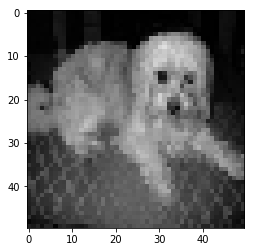

'Dog'

In [207]:
show_predict(d[379][0].reshape(50, 50, 1))

In [159]:
d = create_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:44<00:00, 119.71it/s]


In [177]:
res = {}
for img in tqdm(d):
    res[int(img[1])] = predict(img[0].reshape(50, 50, 1))

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:49<00:00, 254.58it/s]


In [192]:
import csv
with open("result.csv", "w") as c:
    for key in sorted([int(i) for i in res.keys()]):
        c.write(str(key) + "," + str(res[str(key)]))
        c.write("\n")

In [199]:
import re
"_".join(re.findall("\w+", " %"))

''

In [211]:
Y

[array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([